In [1]:
%load_ext autoreload
%autoreload 2
from sgtaxidata import *
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt


DBNAME='../taxis.db'
DATE='20170626'

In [2]:
dates=taxis.get_dates(DBNAME)
dates

['20170624',
 '20170625',
 '20170626',
 '20170627',
 '20170628',
 '20170629',
 '20170630',
 '20170701',
 '20170702',
 '20170703',
 '20170704',
 '20170705',
 '20170706',
 '20170707',
 '20170708']

In [3]:
lat,lon=utils.get_lat_long("Buangkok")
print lat,lon

1.3830715 103.8931105


In [4]:
data=[analysis.get_weekday_data(date,DBNAME,lat,lon,holidays=[DATE]) for date in dates]
data=[x for x in data if x is not None]

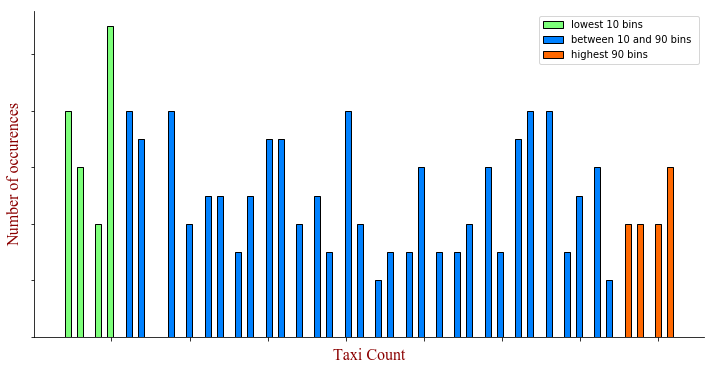

In [5]:
d=data[4]
visualize.plot_hist(d['TaxiCount'])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


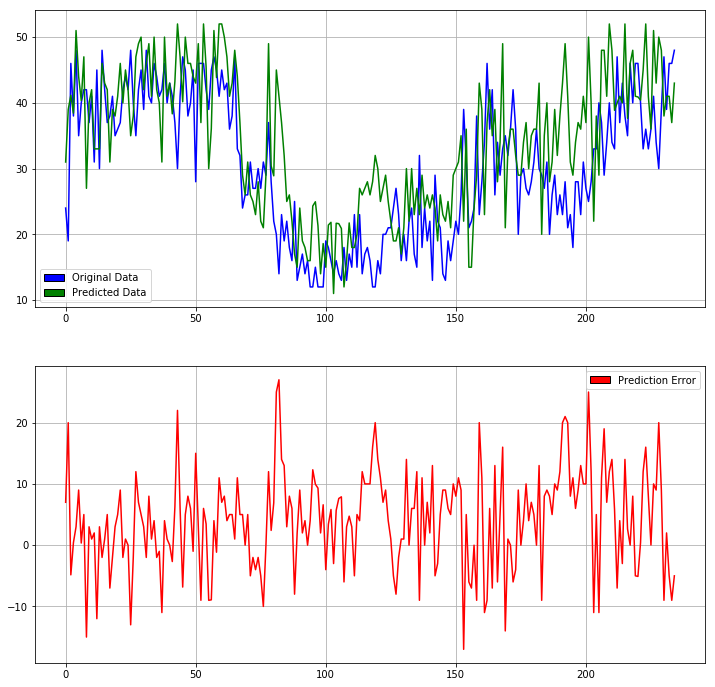

In [6]:
kn=KNeighborsRegressor(weights='distance')
for df in data[:-1]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    kn.fit(X,y)
    print kn.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,kn)

/Users/hari/python/py2/taxidata/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.826451589079
0.577179123027
0.679848166463
0.709504025883
0.717618717909
0.487885717618
0.603527561117
0.454147084715
0.654710734308


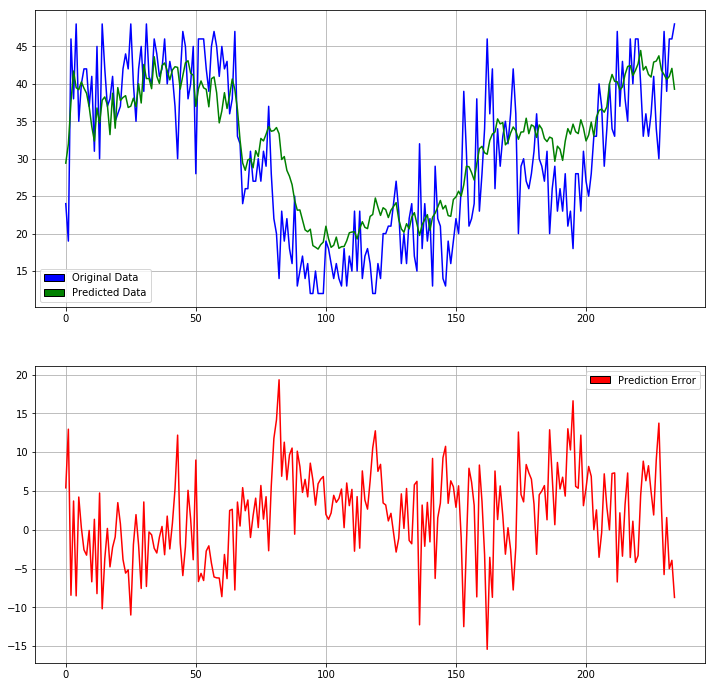

In [7]:
rf=RandomForestRegressor(n_estimators=10,n_jobs=10,warm_start=True)
for df in data[:-1]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    rf.fit(X,y)
    rf.n_estimators+=10
    print rf.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,rf)

-0.638330344743
0.737722381041
0.677293082066
0.733703797075
0.650155246581
0.519237682742
0.60777504958
0.436721150461
0.654710734308


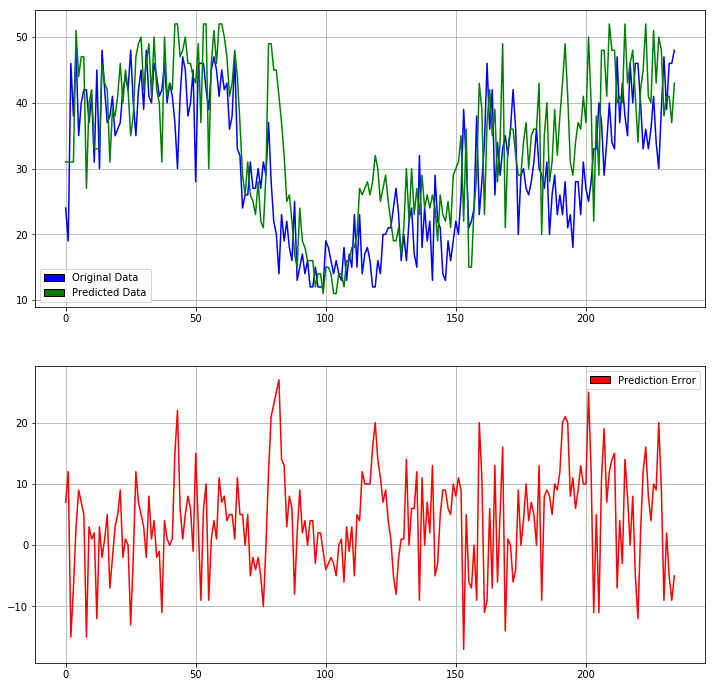

In [8]:
dt=DecisionTreeRegressor()
for df in data[:-1]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    dt.fit(X,y)
    print rf.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,dt)

/Users/hari/python/py2/taxidata/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.638330344743
0.737722381041
0.677293082066
0.733703797075
0.650155246581
0.519237682742
0.60777504958
0.436721150461
0.654710734308


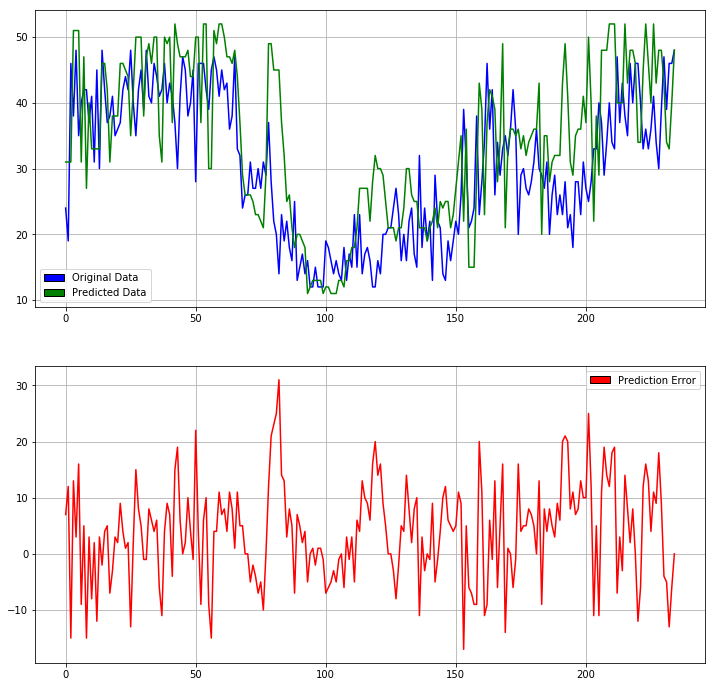

In [9]:
ab=AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=300,loss='square')
for df in data[:-1]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    ab.fit(X,y)
    print rf.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,ab)

0.737722381041


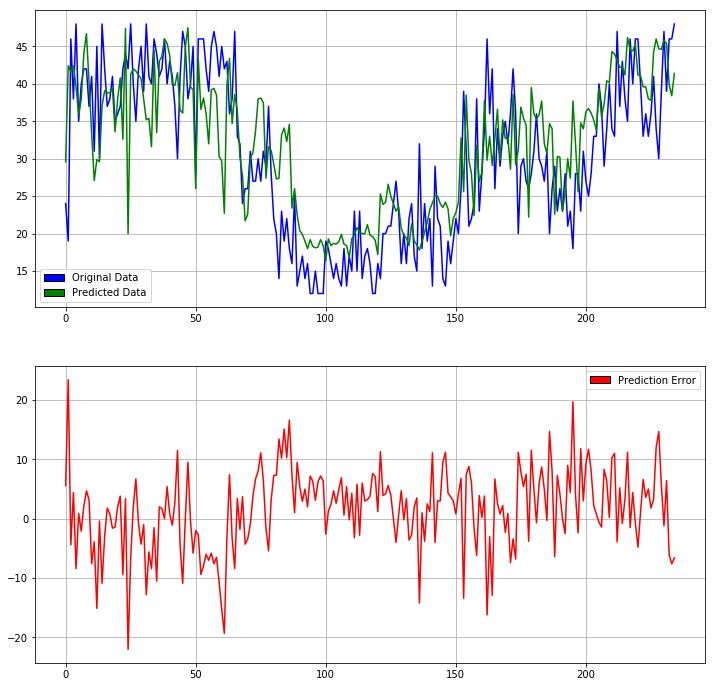

In [10]:
ab=AdaBoostRegressor(RandomForestRegressor(),n_estimators=300,loss='exponential')
for df in data[1:2]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    ab.fit(X,y)
    print rf.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,ab)

In [12]:
df=taxis.get_df_all_taxi_data_raw(DBNAME)

In [45]:
df1=df[df['Date']==DATE]
df1=df1[df1['Time']=='0930']

In [37]:
df1.head()

,Point,Date,Time,Lat,Lon
2019915,2019915,20170626,0900,1.27506,103.62248
2019916,2019916,20170626,0900,1.28633,103.62338
2019917,2019917,20170626,0900,1.29526,103.62398
2019918,2019918,20170626,0900,1.30636,103.62814
2019919,2019919,20170626,0900,1.31449,103.62871


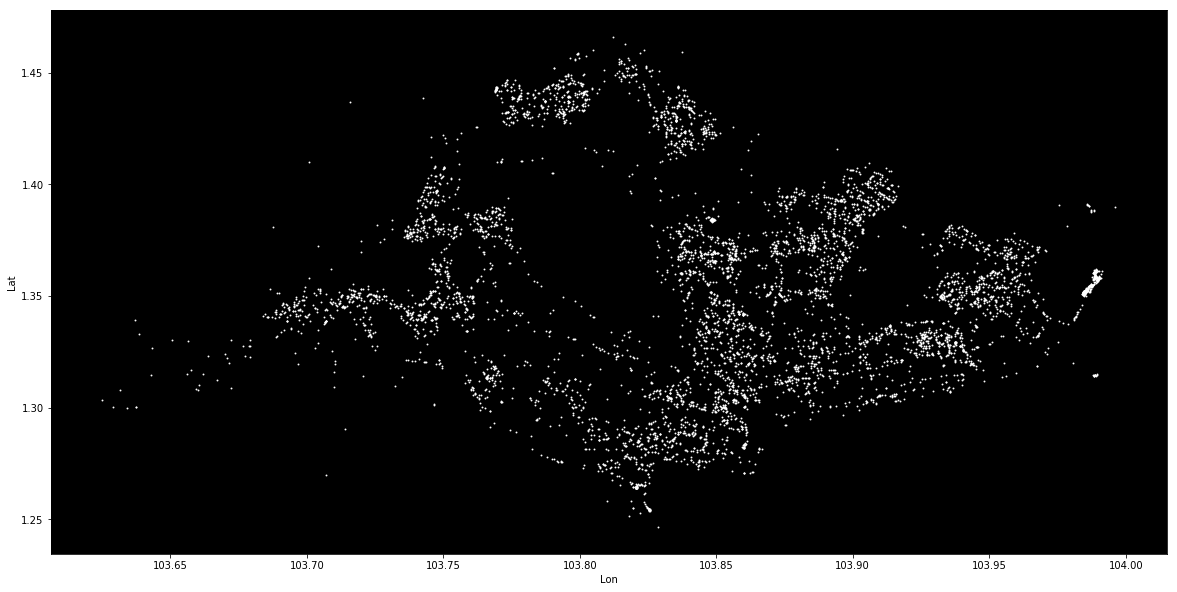

In [48]:
visualize.plot_map(df1)